CSV loaded with 569 rows and 33 columns.
Dropped 'Unnamed: 32' column (empty).

✅ Selected features: ['perimeter_mean', 'concave points_mean', 'radius_worst', 'perimeter_worst', 'concave points_worst']

Top scores:
                  Feature       Score
27  concave points_worst  964.385393
22       perimeter_worst  897.944219
7    concave points_mean  861.676020
20          radius_worst  860.781707
2         perimeter_mean  697.235272
23            area_worst  661.600206
0            radius_mean  646.981021
3              area_mean  573.060747
6         concavity_mean  533.793126
26       concavity_worst  436.691939


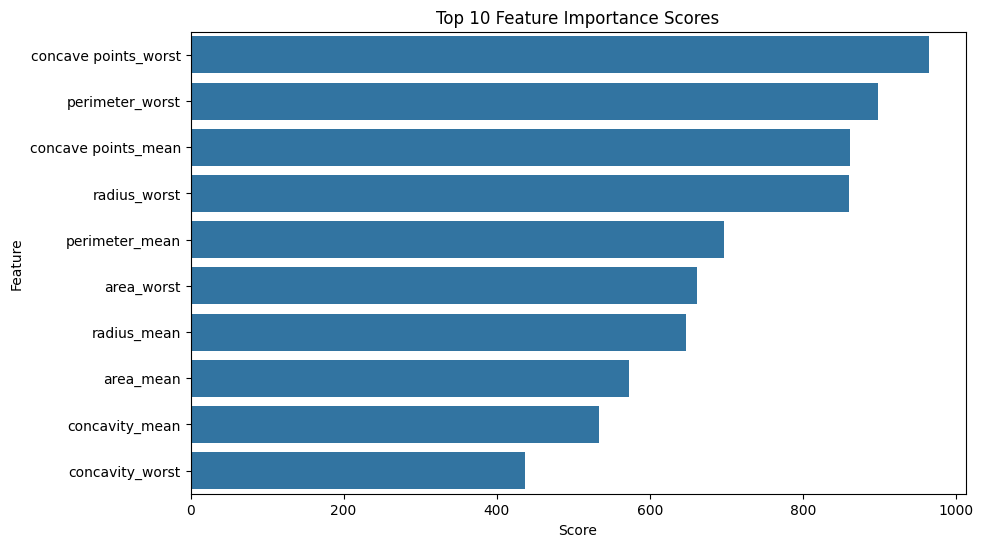

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Load CSV
data_dir = "/content/data"
csv_path = f"{data_dir}/Breast_cancer_dataset.csv"

labels_df = pd.read_csv(csv_path)
print(f"CSV loaded with {labels_df.shape[0]} rows and {labels_df.shape[1]} columns.")

# Drop the completely empty column if it exists
if "Unnamed: 32" in labels_df.columns:
    labels_df = labels_df.drop(columns=["Unnamed: 32"])
    print("Dropped 'Unnamed: 32' column (empty).")

# Encode target
le = LabelEncoder()
y = le.fit_transform(labels_df['diagnosis'])

# Drop non-feature columns
X = labels_df.drop(columns=['id','diagnosis'], errors='ignore')

# Impute missing values with column mean
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Feature selection
selector = SelectKBest(score_func=f_classif, k=5)
X_selected = selector.fit_transform(X_imputed, y)

scores = pd.DataFrame({'Feature': X.columns, 'Score': selector.scores_}).sort_values('Score', ascending=False)
selected_features = X.columns[selector.get_support()].tolist()
print(f"\n✅ Selected features: {selected_features}")
print("\nTop scores:\n", scores.head(10))

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='Score', y='Feature', data=scores.head(10))
plt.title('Top 10 Feature Importance Scores')
plt.show()
